In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [10]:
# Read in dataset
df = pd.read_csv('heart.csv')
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
# shape of dataset
print('Data type: ', type(df))
print('Data dims: ', df.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (1025, 14)


In [8]:
# data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


By performing some quick observations on the dataset, we were able to deduce the following:
* There are `14` features and `1025` observations in the dataset.
* The response variable seems to be `target`, while the remaining 13 features are most likely predictors.
* There is only `1` feature identified as `float64` by default, while the rest are `int64`. They all appear to be `Numeric` variables.
* At first glance, no features contain null or N/A observations. However, more data exploration will have to be performed to confirm this.

The description of the dataset, as provided by Kaggle, is as follows:

In [14]:
# view metadata description of features
from pathlib import Path
file = Path.cwd() / 'data_description.txt'

with open(file, 'r') as text:
    metadata = text.read()
    print(metadata)

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.


From the metadata file `data_description.txt` and observations on the dataset, we can then deduce the following about the features:
* The predictors `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal` and the response variable `target` are nominal categorical variables.
* The predictors `age`, `trestbps`, `chol`, `thalach` and `oldpeak` are continuous numeric variables

In [21]:
cat_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
cont_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<h3>Exploratory Data Analysis</h3>

First, we will perform EDA on the response variable `target`.

In [9]:
df['target'].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [16]:
df['target'].unique()

array([0, 1], dtype=int64)

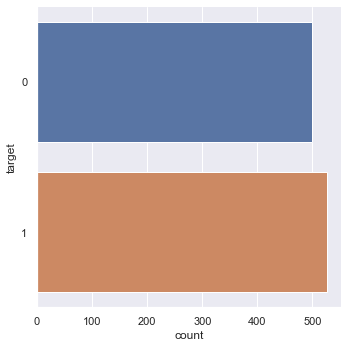

In [18]:
sb.catplot(y = 'target', data = df, kind = 'count')

In [20]:
countHD, countNHD = df['target'].value_counts()
print('Ratio of patients w/ Heart Disease : w/o Heart Disease = ', countHD, ":", countNHD)

Ratio of patients w/ Heart Disease : w/o Heart Disease =  526 : 499


The class imbalance for the response variable `target` is minimal.

Now we will perform data exploration on the nominal categorical variables.

C:\Users\ymtbr\anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\ymtbr\anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\ymtbr\anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\ymtbr\anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\ymtbr\anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not

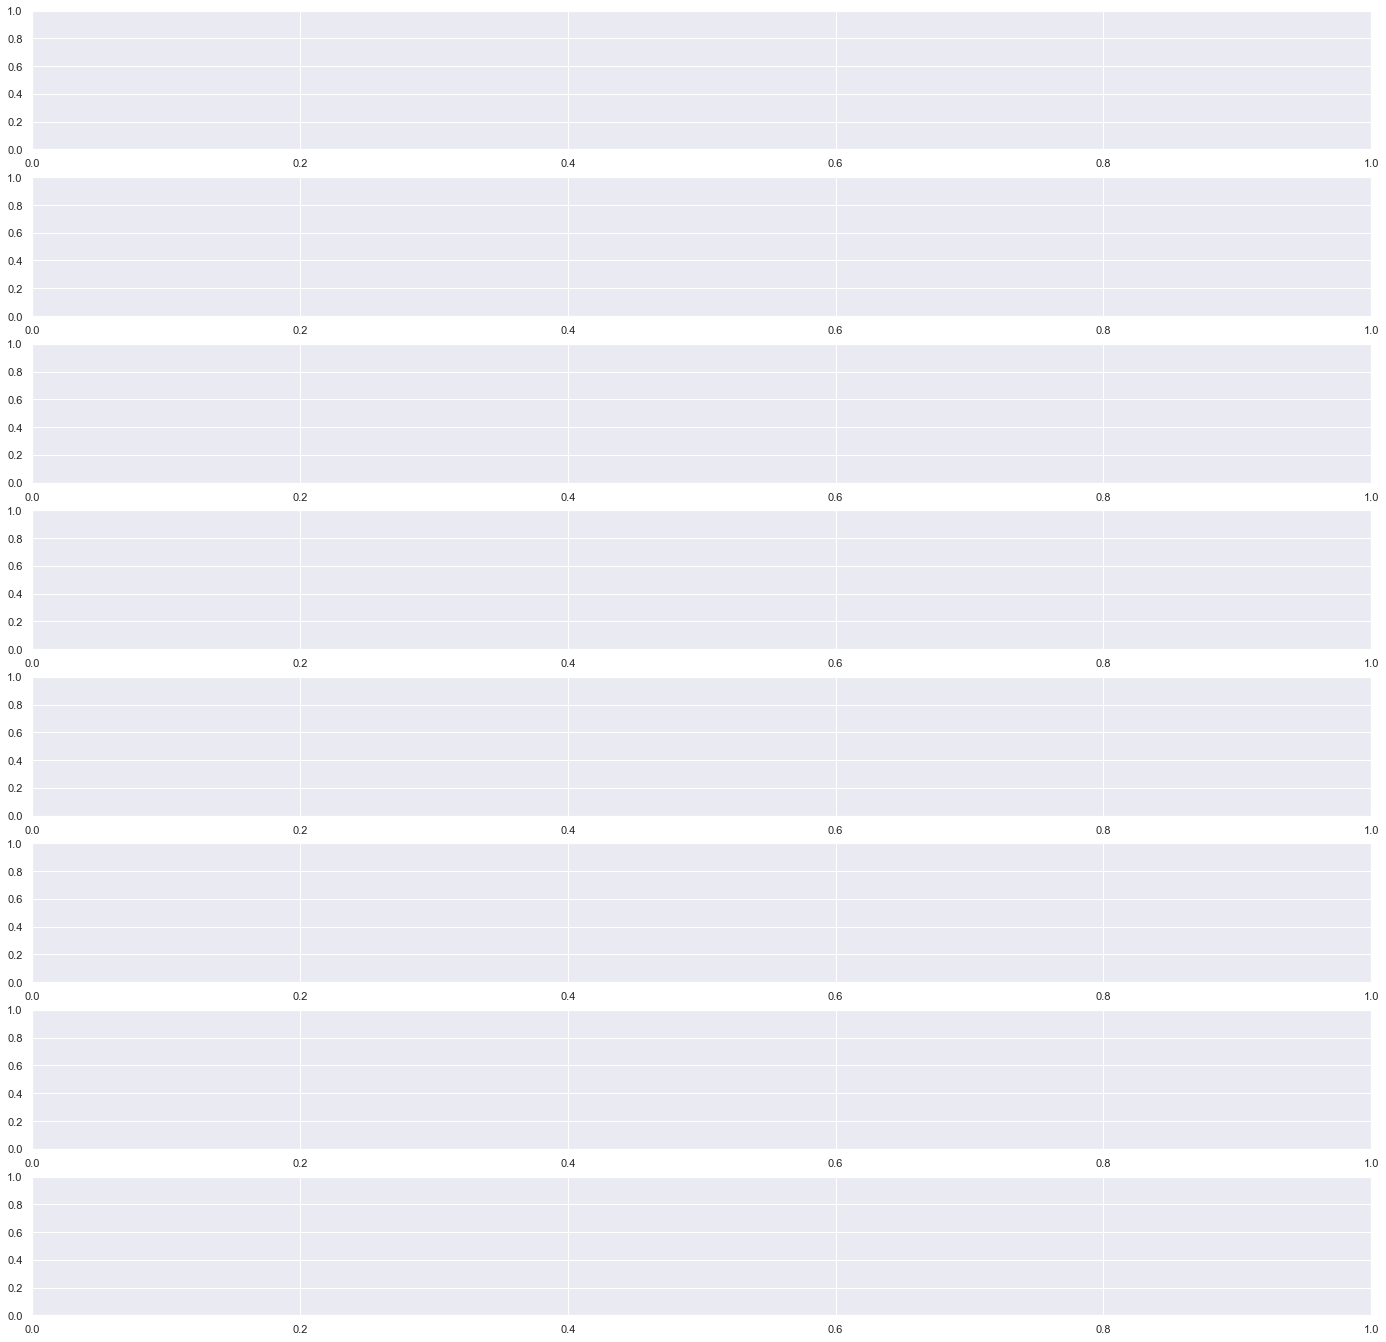

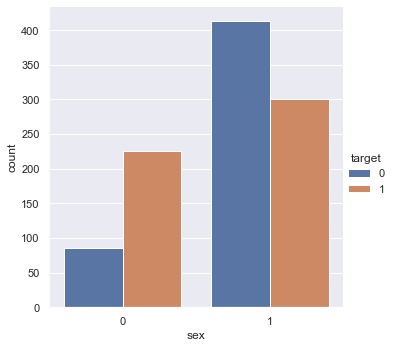

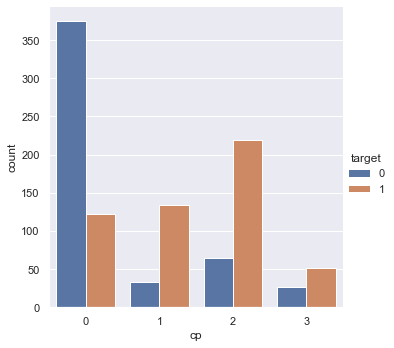

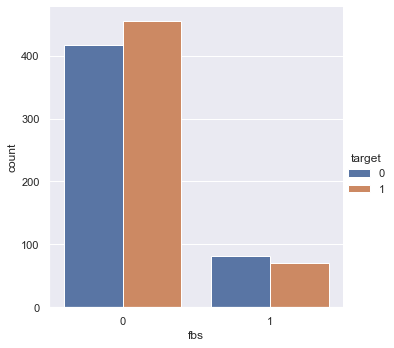

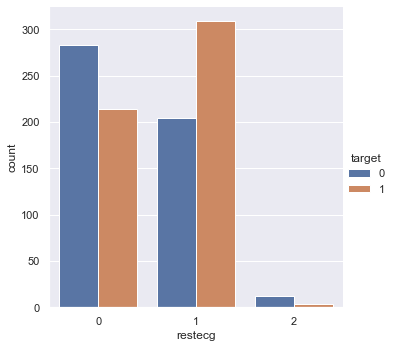

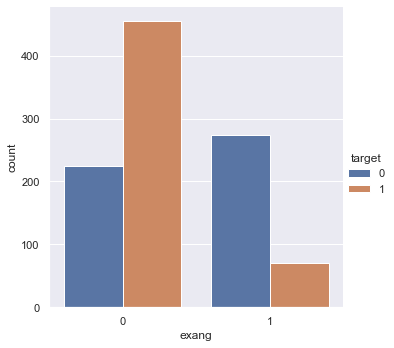

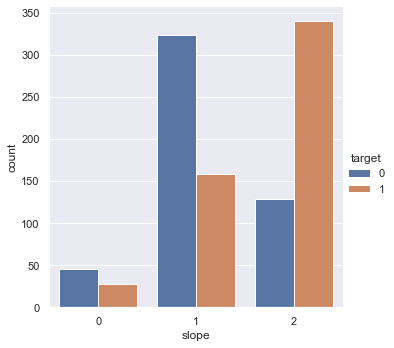

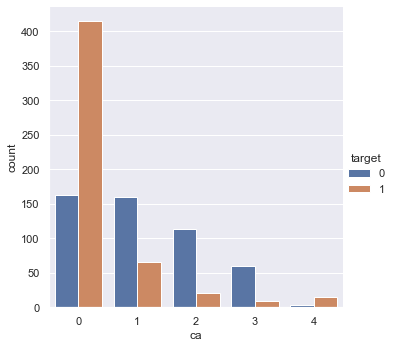

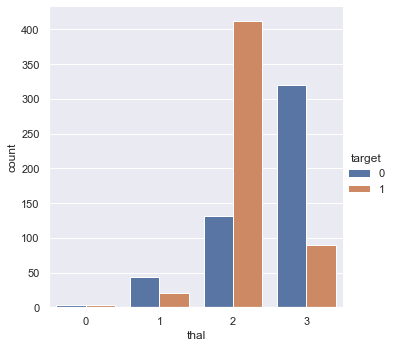

In [29]:
f, axes = plt.subplots(len(cat_list), 1, figsize=(24,24))

count = 0
for i in cat_list:
    g = sb.catplot(x = cat_list[count], data = df, hue = 'target', kind = 'count',
                  ax=axes[count])
    count+=1